# Tafelübung Filter

a*sin(b*x)
a*b*cos(b*x)
f(1.57)  = -1.93
f'(1.57) = -32.81


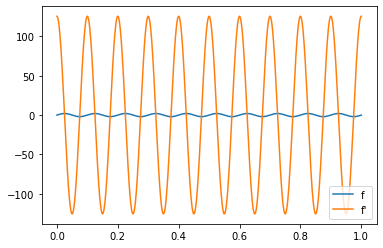

Funktionsgleichung
Ableitung
Funktionsgleichung
Ableitung
Test 1 0.8940798793848858 5 7.632842136118256e-10
Test 2 0.8940798793848858 7 1.6796245505545926e-09
Sympy [0.894079879384886, -0.720025064339369 - 0.583207774024977*I, -0.720025064339369 + 0.583207774024977*I, 0.272985124646926 - 0.950007936405106*I, 0.272985124646926 + 0.950007936405106*I]


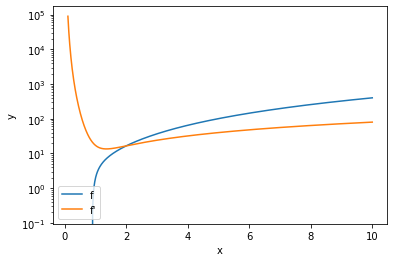

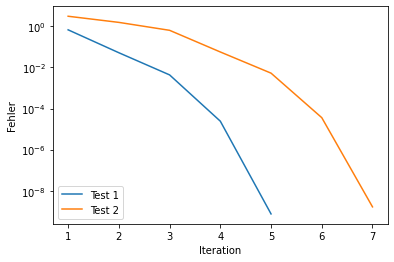

Lagrange-Funktion
                                            2
                              2   ⎛d       ⎞ 
-g⋅l⋅m⋅(1 - cos(φ(t))) + 0.5⋅l ⋅m⋅⎜──(φ(t))⎟ 
                                  ⎝dt      ⎠ 
Euler-Lagrange-Gleichung
                             2      
                       2    d       
g⋅l⋅m⋅sin(φ(t)) + 1.0⋅l ⋅m⋅───(φ(t))
                             2      
                           dt       
Kleinwinkelnäherung
                        2      
                  2    d       
g⋅l⋅m⋅φ(t) + 1.0⋅l ⋅m⋅───(φ(t))
                        2      
                      dt       
Allgemeine Lösung
C₁⋅sin(1.0⋅ω⋅t) + C₂⋅cos(1.0⋅ω⋅t)
Allgemeine Ableitung
1.0⋅C₁⋅ω⋅cos(1.0⋅ω⋅t) - C₂⋅ω⋅sin(1.0⋅ω⋅t)
Spezielle Lösung
A⋅cos(1.0⋅ω⋅t)


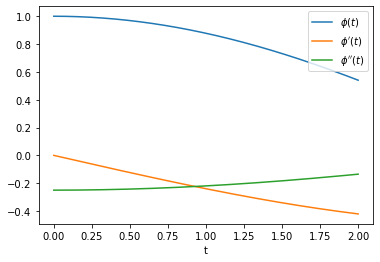

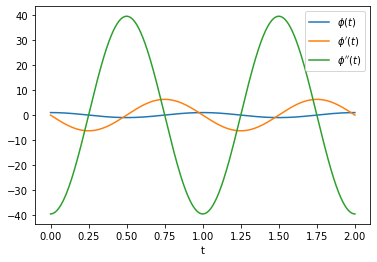

In [1]:
%run ../02/Tag02.ipynb

In [2]:
import numpy as np
from scipy.io import savemat, loadmat
from scipy.signal import butter, sosfiltfilt, spectrogram, sosfreqz
import pylab as pl

## Simulation einer Messung

In [3]:
g = 9.81  # m/s²
l = 0.25  # m
A0 = 10.0  # °
T = 5.0  # s

In [4]:
om = (g/l)**0.5
f = om / (2*np.pi)

In [5]:
print('Pendelfrequenz: %.2f Hz' % f)

Pendelfrequenz: 1.00 Hz


In [7]:
t = np.linspace(0, T, 1001)
dt = t[1] - t[0]
print('Zeitdiskretisierung: %.4f s' % dt)

Zeitdiskretisierung: 0.0050 s


In [8]:
phi = phit_f(A0, om, t)

In [9]:
err = np.random.uniform(-1, 1, len(t)) * 0.25 * A0
gest = phi + err

In [10]:
sdict = {'t' : t, 'phi': phi, 'gest': gest}
savemat('results.mat', sdict)

In [11]:
di = loadmat('results.mat')
di

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Sep 29 11:05:59 2021',
 '__version__': '1.0',
 '__globals__': [],
 't': array([[0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]]),
 'phi': array([[10.        ,  9.9950954 ,  9.98038641, ...,  9.87599136,
          9.92031233,  9.95490228]]),
 'gest': array([[ 9.36135023,  8.32210866, 11.79421807, ...,  7.41187929,
          8.87335832, 12.44590829]])}

In [15]:
t = di['t']
print(t.shape)

(1, 1001)


In [16]:
t = di['t'][0]
print(t.shape)

(1001,)


In [17]:
ori = di['phi'][0]
sig = di['gest'][0]

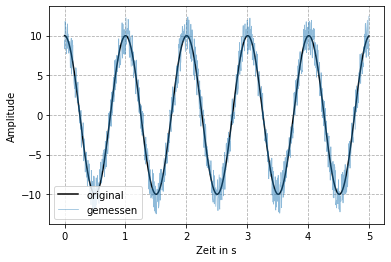

In [19]:
pl.figure()
pl.plot(t, ori, label='original', c='black')
pl.plot(t, sig, label='gemessen', alpha=0.5, lw=0.75)
pl.xlabel('Zeit in s')
pl.ylabel('Amplitude')
pl.grid(ls='--')
pl.legend();

In [20]:
phif = np.fft.fft(ori)
gesf = np.fft.fft(sig)

L = len(phif) // 2 + 1
dt = t[1] - t[0]
fs = 1 / dt
print('Sampling interval: %.4f s' % dt)
print('Sampling frequenz: %.1f Hz' % fs)

Sampling interval: 0.0050 s
Sampling frequenz: 200.0 Hz


In [21]:
freq = np.linspace(0, fs/2, L)

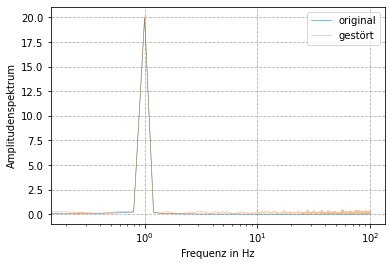

In [28]:
pl.figure()
pl.semilogx(freq, 2/L*np.abs(phif[:L]), label='original', lw=0.5)
pl.semilogx(freq, 2/L*np.abs(gesf[:L]), label='gestört', alpha=0.5, lw=0.75)
pl.xlabel('Frequenz in Hz')
pl.ylabel('Amplitudenspektrum')
pl.grid(ls='--')
pl.legend();

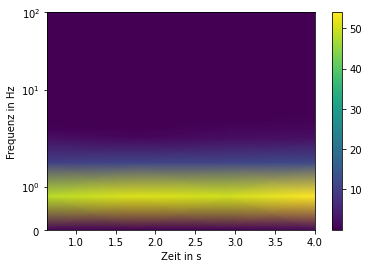

In [35]:
fss, tss, Sxx = spectrogram(sig, fs)

pl.figure()
pl.pcolormesh(tss, fss, Sxx, shading='gouraud')
pl.yscale('symlog')
pl.xlabel('Zeit in s')
pl.ylabel('Frequenz in Hz')
pl.colorbar();

In [36]:
Sxx

array([[4.23869498e-01, 1.56510847e-04, 3.75181434e-01, 9.77198464e-01],
       [4.84196772e+01, 5.11798863e+01, 5.01123420e+01, 5.39441468e+01],
       [1.02401612e+01, 1.10312196e+01, 1.12184993e+01, 1.20262884e+01],
       [2.20814005e+00, 1.22042314e+00, 2.02878238e+00, 2.42495704e+00],
       [4.00058357e-01, 9.88591609e-02, 7.51673727e-01, 8.66164350e-01],
       [1.58623017e-01, 8.84365416e-02, 1.34404777e-01, 5.32724514e-01],
       [2.96677434e-02, 2.24083087e-02, 4.65915115e-02, 1.03587189e-01],
       [2.46973984e-02, 1.48063110e-02, 2.33367112e-03, 9.48568650e-03],
       [8.70219358e-03, 2.01073975e-02, 1.08231828e-02, 1.26036462e-02],
       [1.57093382e-02, 2.17953972e-02, 7.91513296e-04, 3.64863474e-03],
       [1.65789612e-02, 1.57987924e-02, 1.06932133e-03, 5.02130605e-02],
       [6.61991932e-03, 2.55011625e-02, 2.06152381e-03, 8.59069670e-03],
       [7.31386735e-02, 3.02750561e-03, 1.07422683e-02, 6.63600262e-03],
       [9.60544662e-04, 7.94402199e-02, 7.46762167e

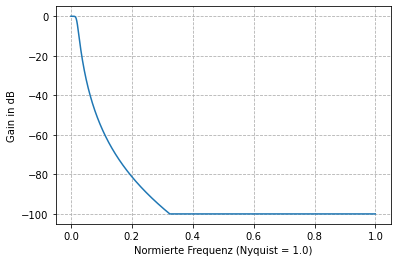

In [43]:
sos = butter(4, 2, 'lowpass', fs=fs, output='sos')
w, h = sosfreqz(sos, worN=1500)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))

pl.figure()
pl.plot(w/np.pi, db)
pl.xlabel('Normierte Frequenz (Nyquist = 1.0)')
pl.ylabel('Gain in dB')
pl.grid(ls='--')

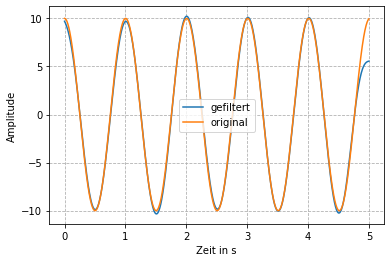

In [44]:
gef = sosfiltfilt(sos, sig)

pl.figure()
pl.plot(t, gef, label='gefiltert')
pl.plot(t, ori, label='original')
pl.grid(ls='--')
pl.xlabel('Zeit in s')
pl.ylabel('Amplitude')
pl.legend();